In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('toy_dataset.csv')

# Просмотр первых строк данных
display(df.head())

# Проверка информации о данных
print(df.info())

# Проверка пропусков
print(df.isnull().sum())

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB
None
Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64


In [18]:
if df.isnull().sum().sum() == 0:
    # Создаем пропуски в столбцах Age и Income
    np.random.seed(42)
    missing_age = np.random.rand(len(df)) < 0.05  # 5% пропусков в Age
    missing_income = np.random.rand(len(df)) < 0.1  # 10% пропусков в Income

    df.loc[missing_age, 'Age'] = np.nan
    df.loc[missing_income, 'Income'] = np.nan

# Проверяем количество пропусков после создания
print(df.isnull().sum())

Number         0
City           0
Gender         0
Age         7391
Income     15059
Illness        0
dtype: int64


In [17]:
# Удаление строк с пропусками
df_clean = df.dropna()

# Проверяем, что пропусков больше нет
print(df_clean.isnull().sum())

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64


Поскольку у нас есть категориальные переменные (Gender, Illness), нам нужно сначала преобразовать их в числовой формат для корреляционного анализа:

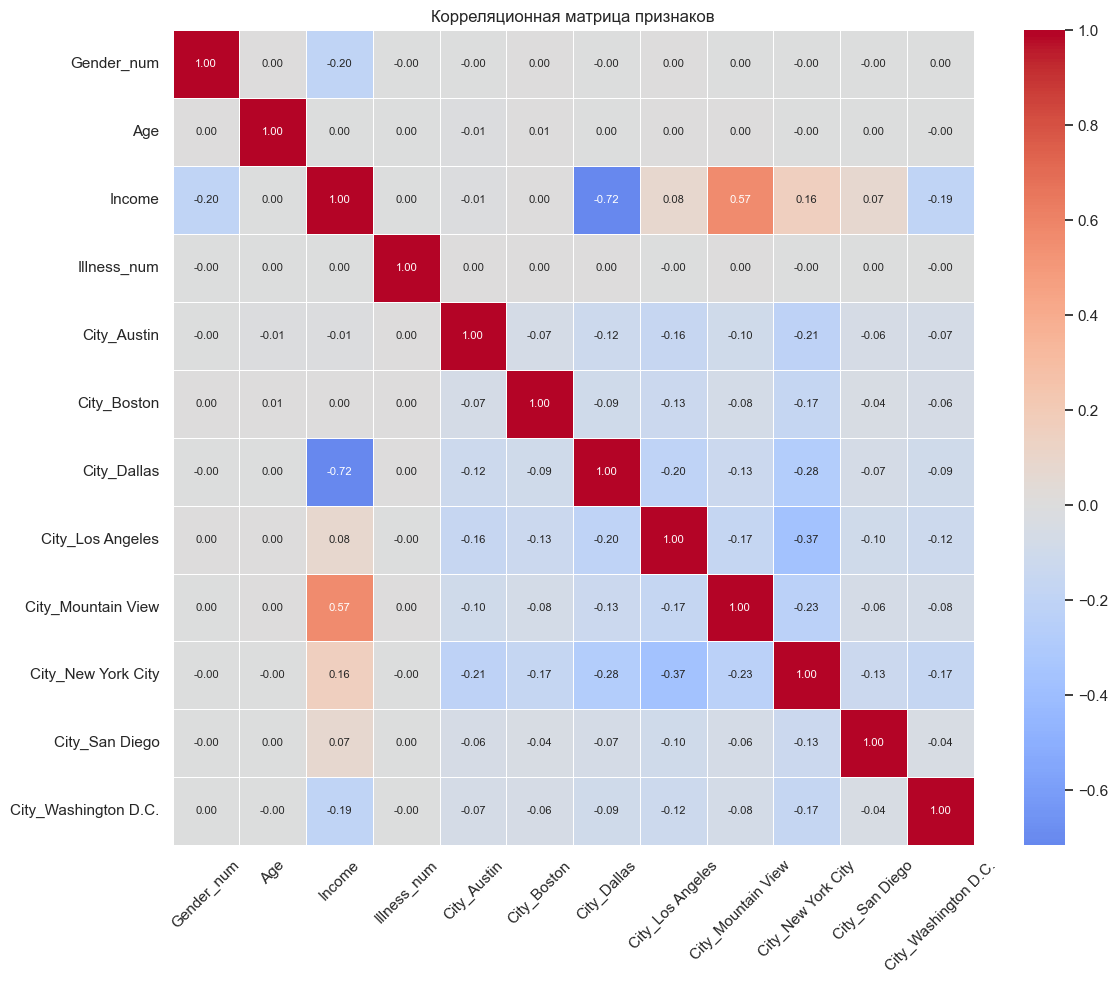

In [24]:
# Создаем копию для работы
df_corr = df_clean.copy()

# Кодируем категориальные переменные
df_corr['Gender_num'] = df_corr['Gender'].map({'Male': 0, 'Female': 1})
df_corr['Illness_num'] = df_corr['Illness'].map({'No': 0, 'Yes': 1})

# One-hot encoding для городов
cities = pd.get_dummies(df_corr['City'], prefix='City')
df_corr = pd.concat([df_corr, cities], axis=1)

# Выбираем только числовые столбцы для корреляции
numeric_cols = ['Gender_num', 'Age', 'Income', 'Illness_num'] + list(cities.columns)
corr_matrix = df_corr[numeric_cols].corr()

# Визуализация
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            annot_kws={"size": 8}, linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Income (Доход) имеет сильную отрицательную корреляцию с City_Dallas (-0.72) и сильную положительную с City_Mountain View (0.57).
- Это означает, что доходы людей в Далласе и Маунтин-Вью сильно различаются. Возможно, в одном из городов зарплаты выше.
- Признак Income может быть важным для модели, особенно если целевая переменная связана с финансами.

Возможные модели
- Если целевая переменная числовая (например, Income):

    - Линейная регрессия.
    - Дерево решений / Random Forest (менее чувствительны к корреляциям).

- Если целевая переменная категориальная (например, Illness_num):

    -  Логистическая регрессия (если признаки нормированы).
    - Градиентный бустинг — лучше работает с категориальными данными.

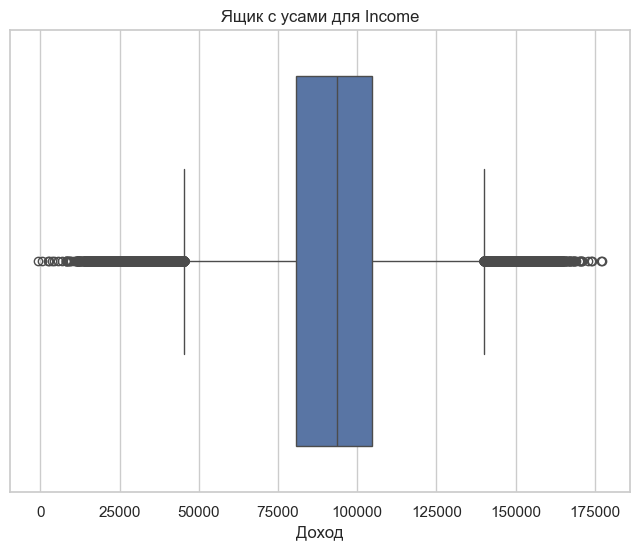

In [25]:
# Построение boxplot для Income
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['Income'])
plt.title('Ящик с усами для Income')
plt.xlabel('Доход')
plt.show()

Boxplot (ящик с усами) для признака Income показывает:

- Основная масса значений дохода лежит в пределах нормального диапазона.

- Присутствуют некоторые выбросы с высокими значениями — они отображаются точками за пределами "усов".

- Это может быть важно для машинного обучения: выбросы могут повлиять на качество моделей, особенно чувствительных к масштабу данных (например, линейная регрессия, KNN).